In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')

In [113]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/willfitzhugh/Desktop/Coding/Supply-Chain-Analysis/Data/Interim/CleanedData.csv',
                   parse_dates=['OrderDate','ShipDate'])
data.head()

,PaymentType,RealShippingDays,ScheduledShippingDays,OrderProfit,OrderSales,Delivery Status,Late_delivery_risk,ProductCategory,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,ProductDepartment,Latitude,Longitude,Market,Order City,Order Country,OrderDate,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order State,Order Status,Product Name,Product Price,ShipDate,Shipping Mode,CustomerName
0,PAYMENT,5,2,-30.750000,115.180000,Late delivery,1,Cleats,Bayamon,Puerto Rico,9083,Home Office,PR,Apparel,18.380119,-66.183128,Pacific Asia,Mirzapur,India,2016-02-24 13:57:00,28744,4.8,0.04,-0.27,2,South Asia,Uttar Pradesh,PENDING_PAYMENT,Perfect Fitness Perfect Rip Deck,59.990002,2016-02-29 13:57:00,Second Class,Mary Frank
1,PAYMENT,2,2,-122.730003,79.180000,Shipping on time,0,Shop By Sport,Caguas,Puerto Rico,4741,Home Office,PR,Golf,18.235573,-66.370613,Pacific Asia,Bursa,Turqua,2016-10-25 14:39:00,45461,0.8,0.01,-1.55,2,West Asia,Bursa,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2016-10-27 14:39:00,Second Class,Mary Smith
2,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,Women's Apparel,Caguas,Puerto Rico,639,Home Office,PR,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,2016-03-30 04:37:00,31115,4.0,0.04,0.35,2,Oceania,Australia del Sur,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2016-04-05 04:37:00,Second Class,Elizabeth Pittman
3,PAYMENT,2,2,24.690001,75.980003,Shipping on time,0,Shop By Sport,Caguas,Puerto Rico,9702,Home Office,PR,Golf,18.273838,-66.370636,Pacific Asia,Kartal,Turqua,2016-10-30 01:31:00,45766,4.0,0.05,0.33,2,West Asia,Estambul,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2016-11-01 01:31:00,Second Class,Katherine Tyler
4,PAYMENT,3,2,9.100000,91.000000,Late delivery,1,Women's Apparel,Caguas,Puerto Rico,9114,Home Office,PR,Golf,18.284805,-66.370590,Pacific Asia,Ulan Bator,Mongolia,2016-11-28 01:18:00,47752,9.0,0.09,0.10,2,Eastern Asia,Uln Bator,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2016-12-01 01:18:00,Second Class,Mary Smith


<AxesSubplot:xlabel='ScheduledShippingDays', ylabel='Count'>

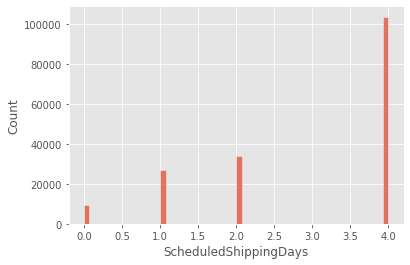

In [4]:
sns.histplot(data=data, x="ScheduledShippingDays")

<AxesSubplot:xlabel='RealShippingDays', ylabel='Count'>

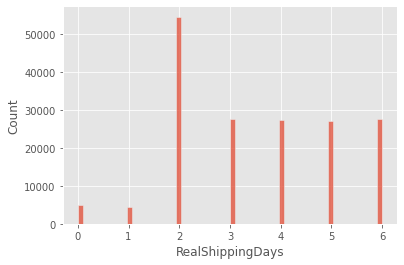

In [5]:
sns.histplot(data=data, x="RealShippingDays")

- There is clearly a discrepency between scheduled shipping days and real shipping days, lotta room for improvement.

In [6]:
#check out late delivery risk, RealShippingDays, ScheduledShippingDays and late delivery status columns

In [95]:
#Accuracy is pretty terrible, models should definitely be able to improve on this
accuracy = (data.RealShippingDays == data.ScheduledShippingDays).mean()
print("The ScheduledShipDays column is accurate", np.round((accuracy*100),1),"percent of the time")

The ScheduledShipDays column is accurate 18.7 percent of the time


In [101]:
avg_days_off = np.mean(np.abs(data.RealShippingDays - data.ScheduledShippingDays))
print("Orders are shipped", np.round(avg_days_off,3),"days off schedule on average")

Orders are shipped 1.286 days off schedule on average


In [114]:
# create late columns
data['late'] = data.RealShippingDays > data.ScheduledShippingDays
data['early'] = data.RealShippingDays < data.ScheduledShippingDays


avg_late_orders = np.round(data.late.mean()* 100, 1)
print((avg_late_orders), "percent of orders are delivered late")
avg_early_orders = np.round(data.early.mean()* 100, 1)
print((avg_early_orders), "percent of orders are delivered early")

57.2 percent of orders are delivered late
24.0 percent of orders are delivered early


In [37]:
avg_very_late = ( (data.RealShippingDays - data.ScheduledShippingDays) > 1 ).mean()
print(np.round(avg_very_late*100,1),"percent of orders are late by more than one day")

23.6 percent of orders are late by more than one day


In [40]:
(data['Delivery Status'] == 'Late delivery').mean()

0.5479293001868084

- Late delivery risk column shows a slightly different average, will explore this quickly:

In [41]:
data.Late_delivery_risk.mean()

0.5479293001868084

In [11]:
(data.late == data.Late_delivery_risk).mean()

0.9755769507113091

In [12]:
((data['Delivery Status'] == 'Late delivery') == data.late).mean()  #late delivery status is not 100% accurate

0.9755769507113091

In [13]:
data[ data["Delivery Status"] == "Late delivery" ].Late_delivery_risk.mean()

1.0

In [14]:
data[ data["Late_delivery_risk"] == 1 ]['Delivery Status'].unique()

array(['Late delivery'], dtype=object)

- Late delivery status and late delivery risk are clearly different versions of the same information. Analysis will be based on shipping days count columns anyway, but the dlivery status and late status columns are suspect.
---

In [49]:
data.head(1)

,PaymentType,RealShippingDays,ScheduledShippingDays,OrderProfit,OrderSales,Delivery Status,Late_delivery_risk,ProductCategory,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,ProductDepartment,Latitude,Longitude,Market,Order City,Order Country,OrderDate,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order State,Order Status,Product Name,Product Price,ShipDate,Shipping Mode,CustomerName,late,route,projected_ShipDate,SchedShipDOW
0,PAYMENT,5,2,-30.75,115.18,Late delivery,1,Cleats,Bayamon,Puerto Rico,9083,Home Office,PR,Apparel,18.380119,-66.183128,Pacific Asia,Mirzapur,India,2016-02-24 13:57:00,28744,4.8,0.04,-0.27,2,South Asia,Uttar Pradesh,PENDING_PAYMENT,Perfect Fitness Perfect Rip Deck,59.990002,2016-02-29 13:57:00,Second Class,Mary Frank,True,Puerto Rico. Pacific Asia,2016-02-26 13:57:00,Friday


In [106]:
'''
This function groups the dataframe by a given column and returns the rate of late orders by column value.
'''

def groupby_late_rate(col, x='late'):
    return data.groupby(col).mean()[[x]].reset_index().sort_values(x, ascending=False)

In [112]:
data.groupby("Shipping Mode").mean()#.reset_index()#[['late']]

,RealShippingDays,ScheduledShippingDays,OrderProfit,OrderSales,Late_delivery_risk,Customer Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Product Price
Shipping Mode,,,,,,,,,,,,,,
First Class,2.000000,1.0,22.650706,182.180653,0.953261,6308.685077,29.618077,-84.908077,34898.649957,20.405520,0.100767,0.125455,2.172098,137.734846
Same Day,0.475632,0.0,20.452164,179.165737,0.455263,6286.843340,30.097995,-85.485325,35077.622907,20.251275,0.102152,0.116221,2.193879,133.601902
Second Class,3.989497,2.0,20.837070,179.998646,0.765990,6241.122138,29.809554,-84.905549,34689.837798,20.459552,0.102308,0.118301,2.169637,135.575921
Standard Class,3.994694,4.0,21.796623,181.021127,0.380324,6293.692714,29.678790,-84.880844,34791.174587,20.405828,0.101632,0.120669,2.167509,136.604301


---

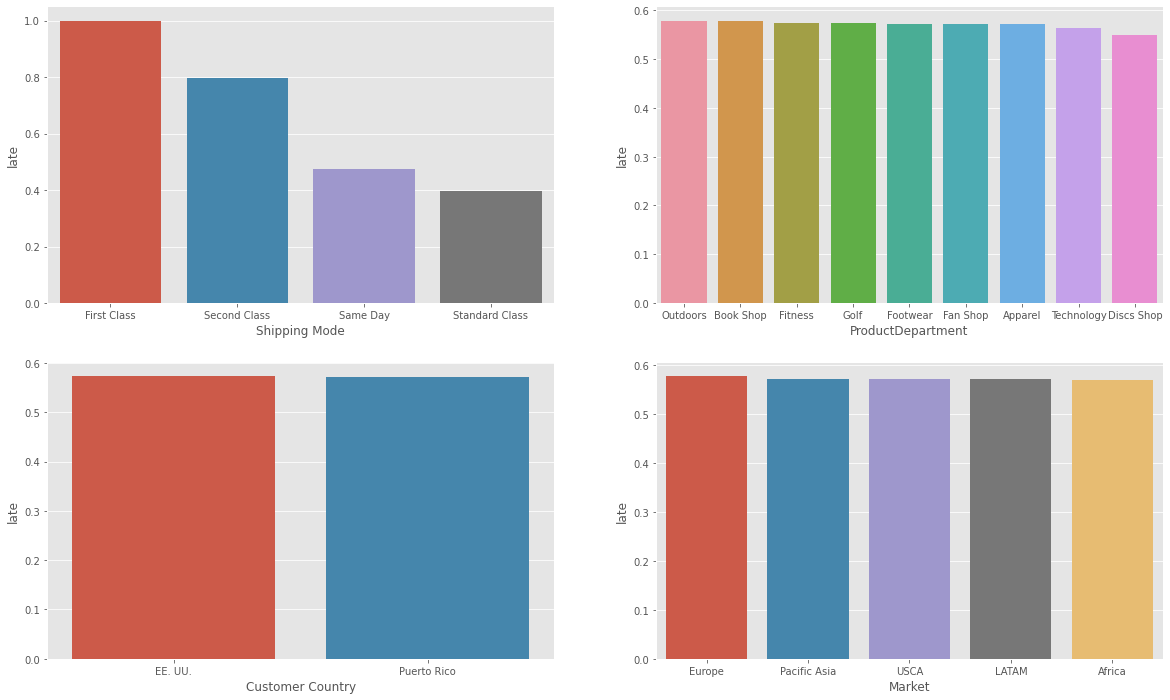

In [65]:
#plot columns potentially correlated to lateness
num_rows, num_cols = 2, 2

fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 12))

plot_cols = ['Shipping Mode','ProductDepartment','Customer Country','Market']
k=0
for row in range(num_rows):
    for col in range(num_cols):
        
        sns.barplot(ax=axes[row,col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], y='late',
                    dodge = False).legend([],[], frameon=False)
        k+=1

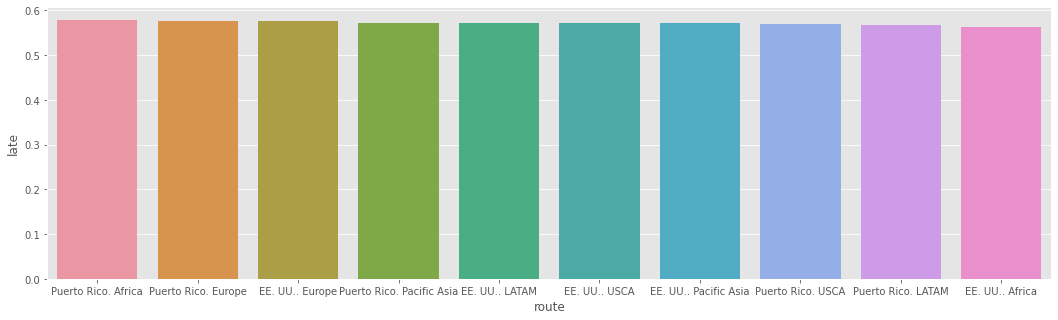

In [47]:
#check if a particular delivery route is late more often.
data['route'] = data['Customer Country'] + '. ' + data['Market']


plt.figure(figsize=(18,5))
ax = sns.barplot(data=groupby_late_rate('route'),x='route', y='late', dodge = False).legend([],[], frameon=False)

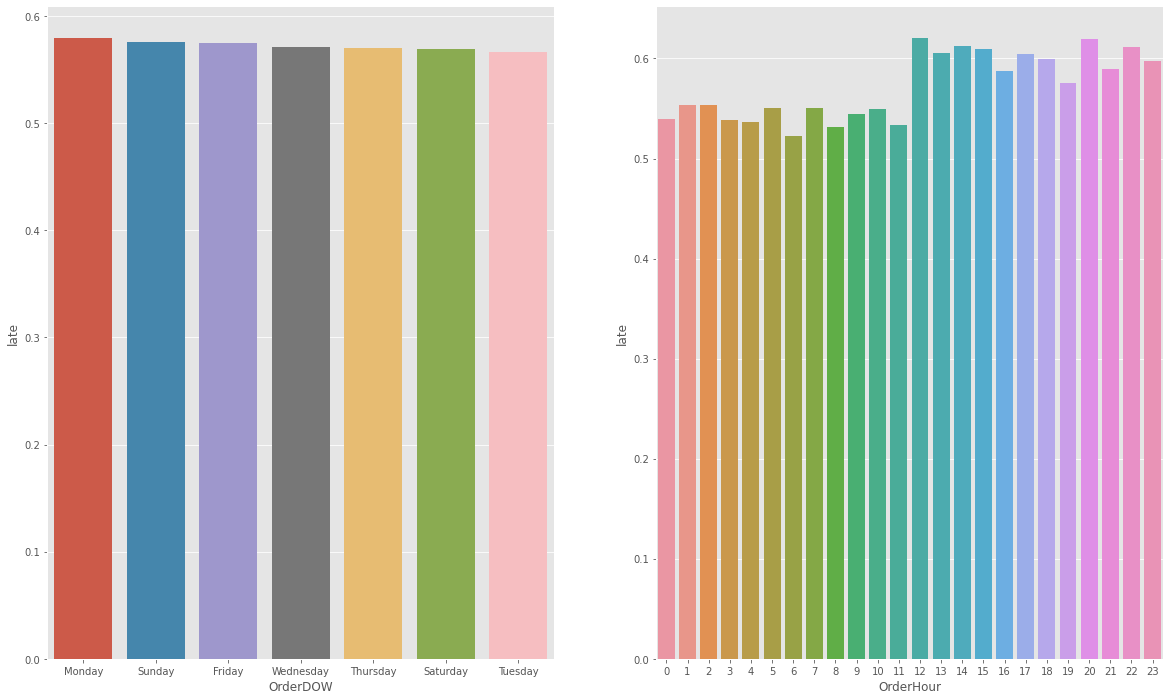

In [20]:
#explore OrderDate col

data['OrderDOW'] = data['OrderDate'].dt.day_name()
data['OrderHour'] = data['OrderDate'].dt.hour

fig, axes = plt.subplots(1, 2, figsize = (20, 12))

plot_cols = ['OrderDOW','OrderHour']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

- so there is a slight bump in late orders for orders recieved after noon. no really significant trend for day of week the order was placed.

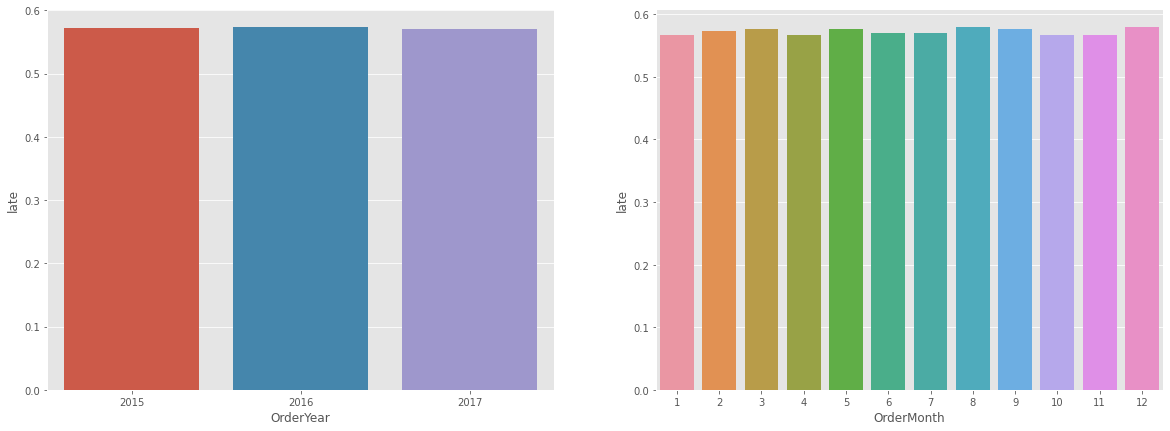

In [58]:
data['OrderMonth'] = data['OrderDate'].dt.month
data['OrderYear'] = data['OrderDate'].dt.year

fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['OrderYear','OrderMonth']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

- some slight variation in lateness in year and order month, but no clear trend.

<AxesSubplot:xlabel='SchedShipDOW', ylabel='late'>

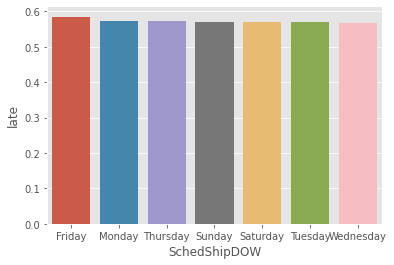

In [48]:
#explore scheduled shipping day of week
### orders shceduled to be shipped on friday are most likely to be late

from datetime import timedelta
data['projected_ShipDate'] = data['OrderDate'] + data.ScheduledShippingDays.map(timedelta)

data['SchedShipDOW'] = data['projected_ShipDate'].dt.day_name()

sns.barplot(data=groupby_late_rate('SchedShipDOW'),x='SchedShipDOW', y='late')

<AxesSubplot:xlabel='ScheduledShippingDays', ylabel='late'>

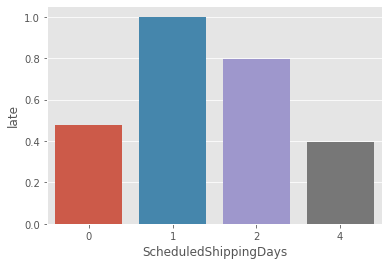

In [23]:
#there is a lot of variation on lateness by scheduled shipping days
sns.barplot(data=groupby_late_rate('ScheduledShippingDays'), x='ScheduledShippingDays', y='late' )

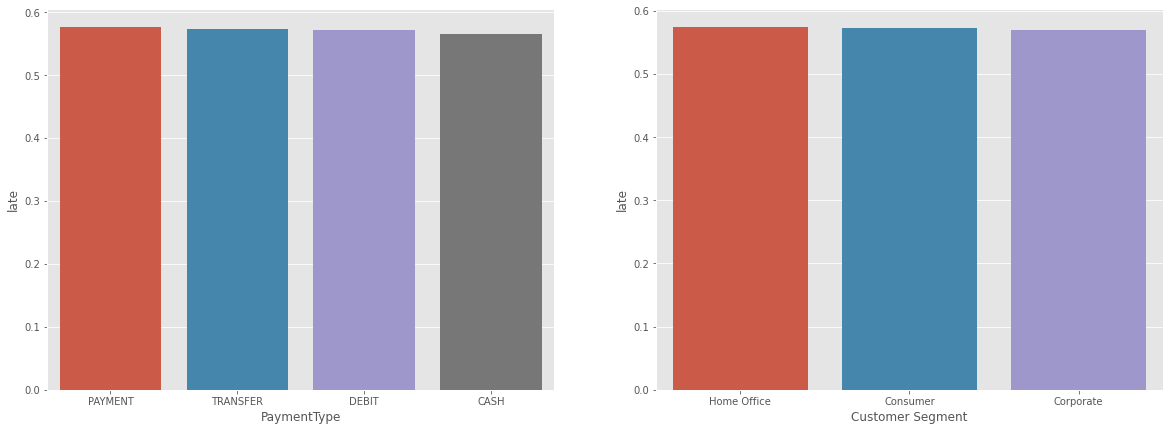

In [115]:
# exploring Payment Type and Cusotmer Segment
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['PaymentType','Customer Segment']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

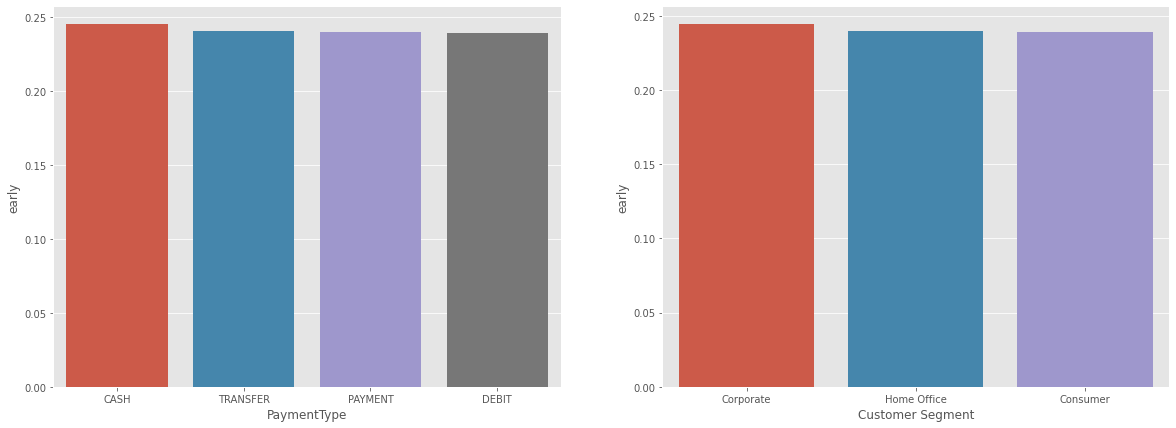

In [122]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['PaymentType','Customer Segment']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k],x='early'),x=plot_cols[k], 
                y='early', dodge = False).legend([],[], frameon=False)
    k+=1

- The corperate customer segment seems to be getting slightly better treatment in terms of delivery time, as well as cash payment type, but only slightly.

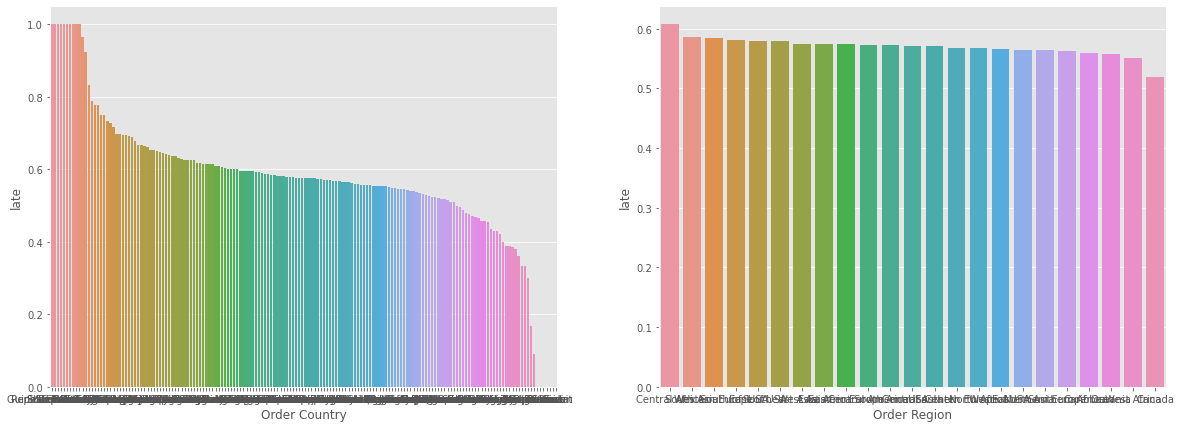

In [124]:
# order city and order state
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['Order Country','Order Region']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

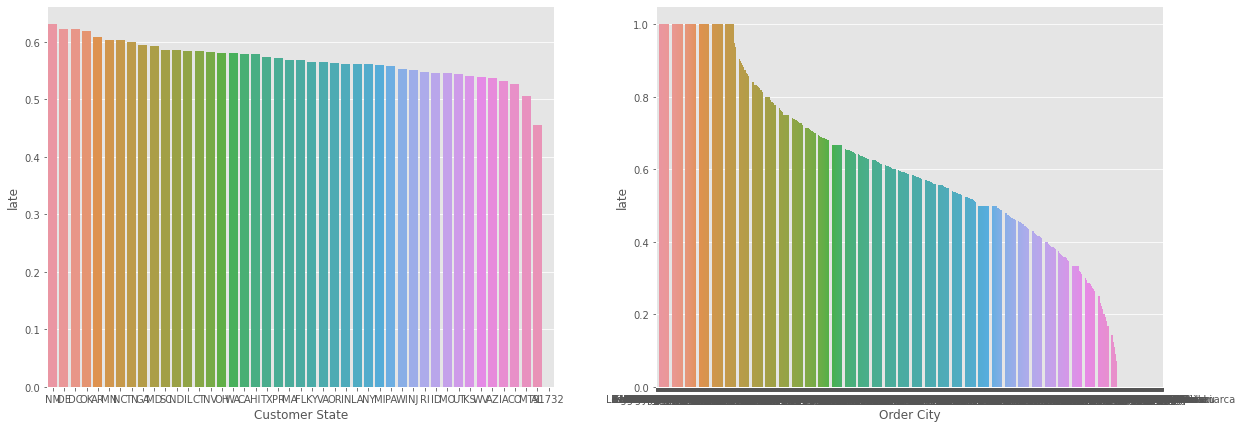

In [90]:
# order city and order state
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['Customer State','Order City']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

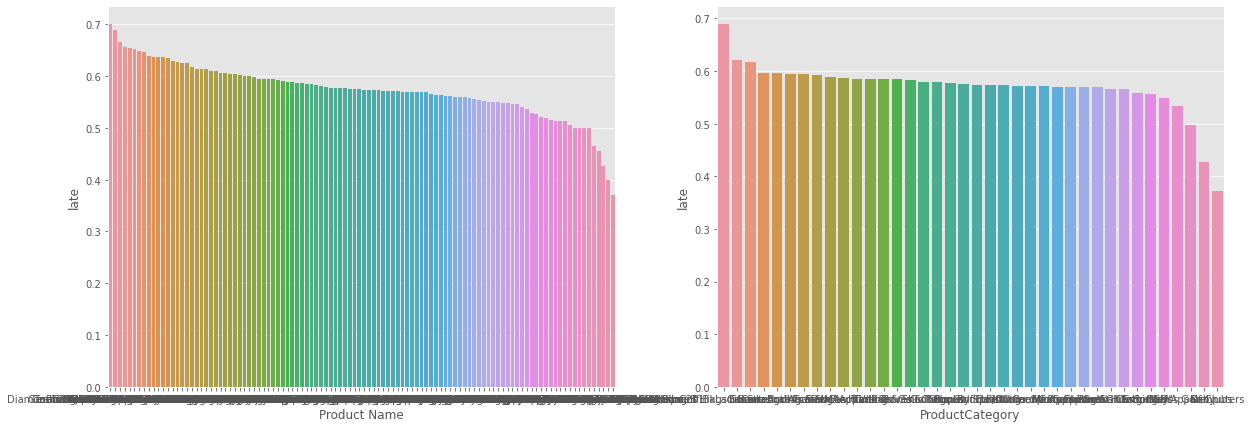

In [75]:
# product category and product name
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

plot_cols = ['Product Name','ProductCategory']
k=0
for col in range(2):

    sns.barplot(ax=axes[col], data=groupby_late_rate(plot_cols[k]),x=plot_cols[k], 
                y='late', dodge = False).legend([],[], frameon=False)
    k+=1

- These columns clearly have some predictive power when it comes to orders, but they are all highly cardinal. Like the fraud model, I could bin this values with target encoding. I may make different versions of models that use varying amounts of this data, to see how these columns effect model predictions.

In [133]:
data['MonthNum'] = data.OrderDate.dt.month
data['year'] = data.OrderDate.dt.year
data.groupby(['year','MonthNum']).count()

PaymentType  RealShippingDays  ScheduledShippingDays  \
year MonthNum                                                         
2015 1                5322              5322                   5322   
     2                4729              4729                   4729   
     3                5362              5362                   5362   
     4                5126              5126                   5126   
     5                5357              5357                   5357   
     6                5134              5134                   5134   
     7                5299              5299                   5299   
     8                5273              5273                   5273   
     9                5140              5140                   5140   
     10               5302              5302                   5302   
     11               5235              5235                   5235   
     12               5371              5371                   5371   
2016 1                5317              5317                   5317   
     2                4894              4894                   4894   
     3                5210              5210                   5210   
     4                5097              5097                   5097   
     5                5302              5302                   5302   
     6                5054              5054                   5054   
     7                5305              5305                   5305   
     8                5334              5334                   5334   
     9                5160              5160                   5160   
     10               5398              5398                   5398   
     11               5210              5210                   5210   
     12               5269              5269                   5269   
2017 1                5217              5217                   5217   
     2                4906              4906                   4906   
     3                5347              5347                   5347   
     4                5212              5212                   5212   
     5                5317              5317                   5317   
     6                4951              4951                   4951   
     7                5318              5318                   5318   
     8                5305              5305                   5305   
     9                5189              5189                   5189   
     10               2013              2013                   2013   

               OrderProfit  OrderSales  Delivery Status  Late_delivery_risk  \
year MonthNum                                                                 
2015 1                5322        5322             5322                5322   
     2                4729        4729             4729                4729   
     3                5362        5362             5362                5362   
     4                5126        5126             5126                5126   
     5                5357        5357             5357                5357   
     6                5134        5134             5134                5134   
     7                5299        5299             5299                5299   
     8                5273        5273             5273                5273   
     9                5140        5140             5140                5140   
     10               5302        5302             5302                5302   
     11               5235        5235             5235                5235   
     12               5371        5371             5371                5371   
2016 1                5317        5317             5317                5317   
     2                4894        4894             4894                4894   
     3                5210        5210             5210                5210   
     4                5097        5097             5097                5097   
     5                5302        53

In [83]:
data.groupby('RealShippingDays').mean()[['Order Item Quantity','Product Price']]

,Order Item Quantity,Product Price
RealShippingDays,,
0,2.200732,134.802232
1,2.186323,132.278577
2,2.163537,138.310509
3,2.181228,135.402519
4,2.157989,136.840264
5,2.167411,136.310184
6,2.178209,134.330064


In [89]:
data.groupby('late').mean()[['Order Item Quantity','Product Price']]

,Order Item Quantity,Product Price
late,,
False,2.168360,137.158307
True,2.171318,135.862415


- There's not much of a trend with price and quantity

---

In [76]:
data.to_csv('/Users/willfitzhugh/Desktop/Coding/Supply-Chain-Analysis/Data/Interim/Ready_For_DeliveryTime_Features.csv',
           index=False)